In [5]:
# import of libraries

import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
from timeit import default_timer as timer
import glob
import matplotlib.pyplot as plt

In [6]:
# import of the CSV file 
df = pd.read_csv('twitter-archive-enhanced.csv')

In [7]:
df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
241,846505985330044928,NaN,NaN,2017-03-27 23:35:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",THIS WAS NOT HIS FAULT HE HAD NO IDEA. 11/10 S...,NaN,NaN,NaN,https://twitter.com/shomaristone/status/846484...,11,10,None,None,None,None,None
222,849668094696017920,NaN,NaN,2017-04-05 17:00:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Gidget. She's a spy pup...,8.331247e+17,4.196984e+09,2017-02-19 01:23:00 +0000,https://twitter.com/dog_rates/status/833124694...,12,10,Gidget,None,None,pupper,None
1349,704134088924532736,NaN,NaN,2016-02-29 02:40:23 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This sneezy pupper is just adorable af. 12/10 ...,NaN,NaN,NaN,https://vine.co/v/igW2OEwu9vg,12,10,None,None,None,pupper,None
213,851591660324737024,NaN,NaN,2017-04-11 00:24:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh jeez u did me quite the spook little fella....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/851591660...,11,10,None,None,None,None,None
1592,686394059078897668,NaN,NaN,2016-01-11 03:47:50 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This pup's having a nightmare that he forgot t...,NaN,NaN,NaN,https://vine.co/v/iMqBebnOvav,12,10,None,None,None,None,None


In [14]:
# import of the TSV file 


url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response
# the request has succeeded, becasue we get the response [200]

<Response [200]>

In [15]:
with open( url.split('/')[-1], mode='wb') as file:
    file.write(response.content)

In [17]:
#import TSV file 
df_image = pd.read_csv('image-predictions.tsv', sep = " ",delimiter='\t')

In [18]:
df_image.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1962,866686824827068416,https://pbs.twimg.com/media/DAcXEWuXkAIBDGJ.jpg,1,flat-coated_retriever,0.514730,True,groenendael,0.306407,True,curly-coated_retriever,0.061314,True
1521,788039637453406209,https://pbs.twimg.com/media/Cu-t20yWEAAFHXi.jpg,1,beach_wagon,0.362925,False,minivan,0.304759,False,limousine,0.101702,False
209,669972011175813120,https://pbs.twimg.com/media/CUw3_QiUEAA8cT9.jpg,1,teddy,0.953071,False,koala,0.007027,False,fur_coat,0.005368,False
880,698635131305795584,https://pbs.twimg.com/ext_tw_video_thumb/69863...,1,Samoyed,0.158464,True,kuvasz,0.089402,True,West_Highland_white_terrier,0.025037,True
318,671763349865160704,https://pbs.twimg.com/media/CVKVM3NW4AAdi1e.jpg,1,prayer_rug,0.445334,False,doormat,0.275311,False,bib,0.048813,False


#### Gather the data from the twitter API

In [19]:
# gather the data from the twitter API

consumer_key = 
consumer_secret = 
access_token = 
access_secret = 

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [20]:
folder_name = 'twitter'
# Make directory if it doesn't already exist
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [21]:

 
tweet = api.get_status('676776431406465024')
print(tweet.text)

When someone yells "cops!" at a party and you gotta get your drunk friend out of there. 10/10 https://t.co/4rMZi5Ca1k


In [ ]:

tweet_ids = df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293: 838083903487373313
Success
294: 837820167694528512
Success


Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success
550: 805207613751304193
Success
551: 804738756058218496
Success
552: 804475857670639616
Success


Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807: 772102971039580160
Success
808: 771908950375665664
Success
809: 771770456517009408
Success
810: 771500966810099713
Success
811

Fail
1052: 742534281772302336
Fail
1053: 742528092657332225
Fail
1054: 742465774154047488
Fail
1055: 742423170473463808
Fail
1056: 742385895052087300
Fail
1057: 742161199639494656
Fail
1058: 742150209887731712
Fail
1059: 741793263812808706
Fail
1060: 741743634094141440
Fail
1061: 741438259667034112
Fail
1062: 741303864243200000
Fail
1063: 741099773336379392
Fail
1064: 741067306818797568
Fail
1065: 740995100998766593
Fail
1066: 740711788199743490
Fail
1067: 740699697422163968
Fail
1068: 740676976021798912
Fail
1069: 740373189193256964
Fail
1070: 740365076218183684
Fail
1071: 740359016048689152
Fail
1072: 740214038584557568
Fail
1073: 739979191639244800
Fail
1074: 739932936087216128
Fail
1075: 739844404073074688
Fail
1076: 739623569819336705
Fail
1077: 739606147276148736
Fail
1078: 739544079319588864
Fail
1079: 739485634323156992
Fail
1080: 739238157791694849
Fail
1081: 738891149612572673
Fail
1082: 738885046782832640
Fail
1083: 738883359779196928
Fail
1084: 738537504001953792
Fail
1085:

Fail
1344: 704761120771465216
Fail
1345: 704499785726889984
Fail
1346: 704491224099647488
Fail
1347: 704480331685040129
Fail
1348: 704364645503647744
Fail
1349: 704347321748819968
Fail
1350: 704134088924532736
Fail
1351: 704113298707505153
Fail
1352: 704054845121142784
Fail
1353: 703774238772166656
Fail
1354: 703769065844768768
Fail
1355: 703631701117943808
Fail
1356: 703611486317502464
Fail
1357: 703425003149250560
Fail
1358: 703407252292673536
Fail
1359: 703382836347330562
Fail
1360: 703356393781329922
Fail
1361: 703268521220972544
Fail
1362: 703079050210877440
Fail
1363: 703041949650034688
Fail
1364: 702932127499816960
Fail
1365: 702899151802126337
Fail
1366: 702684942141153280
Fail
1367: 702671118226825216
Fail
1368: 702598099714314240
Fail
1369: 702539513671897089
Fail
1370: 702332542343577600
Fail
1371: 702321140488925184
Fail
1372: 702276748847800320
Fail
1373: 702217446468493312
Fail
1374: 701981390485725185
Fail
1375: 701952816642965504
Fail
1376: 701889187134500865
Fail
1377:

Fail
1649: 683773439333797890
Fail
1650: 683742671509258241
Fail
1651: 683515932363329536
Fail
1652: 683498322573824003
Fail
1653: 683481228088049664
Fail
1654: 683462770029932544
Fail
1655: 683449695444799489
Fail
1656: 683391852557561860
Fail
1657: 683357973142474752
Fail
1658: 683142553609318400
Fail
1659: 683111407806746624
Fail
1660: 683098815881154561
Fail
1661: 683078886620553216
Fail
1662: 683030066213818368
Fail
1663: 682962037429899265
Fail
1664: 682808988178739200
Fail
1665: 682788441537560576
Fail
1666: 682750546109968385
Fail
1667: 682697186228989953
Fail
1668: 682662431982772225
Fail
1669: 682638830361513985
Fail
1670: 682429480204398592
Fail
1671: 682406705142087680
Fail
1672: 682393905736888321
Fail
1673: 682389078323662849
Fail
1674: 682303737705140231
Fail
1675: 682259524040966145
Fail
1676: 682242692827447297
Fail
1677: 682088079302213632
Fail
1678: 682059653698686977
Fail
1679: 682047327939461121
Fail
1680: 682032003584274432
Fail
1681: 682003177596559360
Fail
1682:

Fail
1966: 673345638550134785
Fail
1967: 673343217010679808
Fail
1968: 673342308415348736
Fail
1969: 673320132811366400
Fail
1970: 673317986296586240
Fail
1971: 673295268553605120
Fail
1972: 673270968295534593
Fail
1973: 673240798075449344
Fail
1974: 673213039743795200
Fail
1975: 673148804208660480
Fail
1976: 672997845381865473
Fail
1977: 672995267319328768
Fail
1978: 672988786805112832
Fail
1979: 672984142909456390
Fail
1980: 672980819271634944
Fail
1981: 672975131468300288
Fail
1982: 672970152493887488
Fail
1983: 672968025906282496
Fail
1984: 672964561327235073
Fail
1985: 672902681409806336
Fail
1986: 672898206762672129
Fail
1987: 672884426393653248
Fail
1988: 672877615439593473
Fail
1989: 672834301050937345
Fail
1990: 672828477930868736
Fail
1991: 672640509974827008
Fail
1992: 672622327801233409
Fail
1993: 672614745925664768
Fail
1994: 672609152938721280
Fail
1995: 672604026190569472
Fail
1996: 672594978741354496
Fail
1997: 672591762242805761
Fail
1998: 672591271085670400
Fail
1999:

Fail
2283: 667211855547486208
Fail
2284: 667200525029539841
Fail
2285: 667192066997374976
Fail
2286: 667188689915760640
Fail
2287: 667182792070062081
Fail
2288: 667177989038297088
Fail
2289: 667176164155375616
Fail
2290: 667174963120574464
Fail
2291: 667171260800061440
Fail
2292: 667165590075940865
Fail
2293: 667160273090932737
Fail
2294: 667152164079423490
Fail
2295: 667138269671505920
Fail
2296: 667119796878725120
Fail
2297: 667090893657276420
Fail
2298: 667073648344346624
Fail
2299: 667070482143944705
Fail
2300: 667065535570550784
Fail
2301: 667062181243039745
Fail
2302: 667044094246576128
Fail
2303: 667012601033924608
Fail
2304: 666996132027977728
Fail
2305: 666983947667116034
Fail
2306: 666837028449972224
Fail
2307: 666835007768551424
Fail
2308: 666826780179869698
Fail
2309: 666817836334096384
Fail
2310: 666804364988780544
Fail
2311: 666786068205871104
Fail
2312: 666781792255496192
Fail
2313: 666776908487630848
Fail
2314: 666739327293083650
Fail
2315: 666701168228331520
Fail
2316:

In [22]:
additional_tweet_data = []

with open('tweet_json.txt') as json_file:  
    for line in json_file:
        json_data = json.loads(line)
        tweet_id = json_data['id']
        retweet_count = json_data['retweet_count']
        favorite_count = json_data['favorite_count']
        additional_tweet_data.append({'retweet_count': int(retweet_count),
                        'favorite_count': int(favorite_count),
                        'tweet_id': tweet_id})



df_tweet = pd.DataFrame(additional_tweet_data, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

In [23]:
df_tweet.sample(10)

,tweet_id,retweet_count,favorite_count
184,855857698524602368,2188,12074
93,874012996292530176,10330,34202
756,777641927919427584,4656,0
356,829011960981237760,17634,56151
324,832757312314028032,3924,17770
162,859607811541651456,1612,18805
682,786963064373534720,8807,28567
696,785515384317313025,1383,6545
720,781655249211752448,1234,4293
381,826204788643753985,1016,5181


In [24]:
df.sample(5)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1750,679001094530465792,NaN,NaN,2015-12-21 18:10:50 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Rascal. He's paddling an imaginary can...,NaN,NaN,NaN,https://vine.co/v/iKIwAzEatd6,11,10,Rascal,None,None,None,None
504,813051746834595840,NaN,NaN,2016-12-25 16:00:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bauer. He had nothing to do with the c...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813051746...,13,10,Bauer,None,None,None,None
2337,666268910803644416,NaN,NaN,2015-11-16 14:57:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Very concerned about fellow dog trapped in com...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666268910...,10,10,None,None,None,None,None
920,756303284449767430,NaN,NaN,2016-07-22 01:42:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Pwease accept dis rose on behalf of dog. 11/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/756303284...,11,10,None,None,None,None,None
29,886366144734445568,NaN,NaN,2017-07-15 23:25:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/886366144...,12,10,Roscoe,None,None,pupper,None


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [26]:
# stats of the main dataframe
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [27]:
#count of the number of sources used to send tweets 
df['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [28]:
# count of the number of each stage category
df['doggo'].value_counts(), df['floofer'].value_counts(), df['pupper'].value_counts(),df['puppo'].value_counts()

(None     2259
 doggo      97
 Name: doggo, dtype: int64, None       2346
 floofer      10
 Name: floofer, dtype: int64, None      2099
 pupper     257
 Name: pupper, dtype: int64, None     2326
 puppo      30
 Name: puppo, dtype: int64)

In [29]:
# check for any duplicated tweet_id 
df[df.duplicated(['tweet_id'], keep=False)]
# there is no duplicated tweet_id

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [30]:
# check for null values in the expanded_urls column
df[df['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [31]:
df[df['expanded_urls'].isnull()].count()

tweet_id                      59
in_reply_to_status_id         55
in_reply_to_user_id           55
timestamp                     59
source                        59
text                          59
retweeted_status_id            1
retweeted_status_user_id       1
retweeted_status_timestamp     1
expanded_urls                  0
rating_numerator              59
rating_denominator            59
name                          59
doggo                         59
floofer                       59
pupper                        59
puppo                         59
dtype: int64

In [32]:
# check for how many retweets there are in the dataset
df.retweeted_status_id.notnull().sum()

181

In [33]:
# check for the rating numerator
df.rating_numerator.sort_values(ascending=False)

979     1776
313      960
189      666
188      420
2074     420
1120     204
290      182
902      165
1779     144
1634     143
1635     121
1228      99
1843      88
433       84
1254      80
695       75
340       75
1351      60
1202      50
1274      45
1433      44
763       27
1712      26
516       24
1663      20
55        17
285       15
291       15
83        14
866       14
        ... 
2183       3
1314       3
1928       3
765        3
2202       3
1692       3
1478       3
1898       3
1249       3
2305       3
2079       2
2326       2
2349       2
2237       2
2246       2
1920       2
1761       2
2310       2
1764       2
1940       1
2038       1
2091       1
1869       1
1446       1
605        1
2338       1
2261       1
2335       1
1016       0
315        0
Name: rating_numerator, Length: 2356, dtype: int64

In [34]:
# check for the null values in the rating_numerator
df[df['rating_numerator'].isnull()]# no null values

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [35]:
# check for the rating_denominator
df.rating_denominator.sort_values(ascending=False)

1120    170
902     150
1634    130
1779    120
1635    110
1228     90
1254     80
1843     80
433      70
1274     50
1351     50
1202     50
1433     40
1598     20
1165     20
1663     16
342      15
1662     11
1068     11
784      11
800      10
778      10
777      10
776      10
779      10
780      10
799      10
775      10
781      10
782      10
       ... 
1556     10
1555     10
1554     10
1553     10
1552     10
1551     10
1550     10
1549     10
1548     10
1547     10
1562     10
0        10
1571     10
1577     10
1564     10
1565     10
1566     10
1567     10
1568     10
1569     10
1570     10
1563     10
1572     10
1573     10
1574     10
1575     10
1576     10
516       7
2335      2
313       0
Name: rating_denominator, Length: 2356, dtype: int64

In [36]:
df_image.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
714,685532292383666176,https://pbs.twimg.com/media/CYN_-6iW8AQhPu2.jpg,1,white_wolf,0.318524,False,dingo,0.215436,False,collie,0.095805,True
602,679828447187857408,https://pbs.twimg.com/media/CW88XN4WsAAlo8r.jpg,3,Chihuahua,0.346545,True,dalmatian,0.166246,True,toy_terrier,0.117502,True
710,685307451701334016,https://pbs.twimg.com/media/CYKzfTTWMAEeTN7.jpg,1,Pomeranian,0.963176,True,Shetland_sheepdog,0.019468,True,keeshond,0.008605,True
40,666691418707132416,https://pbs.twimg.com/media/CUCQTpEWEAA7EDz.jpg,1,German_shepherd,0.975401,True,beagle,0.008687,True,bloodhound,0.005394,True
2029,882762694511734784,https://pbs.twimg.com/media/DEAz_HHXsAA-p_z.jpg,1,Labrador_retriever,0.850050,True,Chesapeake_Bay_retriever,0.074257,True,flat-coated_retriever,0.015579,True


In [37]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [38]:
# stats on the image dataframe 
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [39]:
# check for any duplicated tweet_id 
df_image[df_image.duplicated(['tweet_id'], keep=False)]
# there is no duplicated tweet_id

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [40]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 3 columns):
tweet_id          887 non-null int64
retweet_count     887 non-null int64
favorite_count    887 non-null int64
dtypes: int64(3)
memory usage: 20.9 KB


In [41]:
df_tweet.describe()

,tweet_id,retweet_count,favorite_count
count,8.870000e+02,887.000000,887.000000
mean,8.201017e+17,5167.542277,14592.604284
std,3.693464e+16,5785.348988,15349.055689
min,7.588287e+17,0.000000,0.000000
25%,7.894226e+17,2132.500000,5482.000000
50%,8.185888e+17,3534.000000,11168.000000
75%,8.482693e+17,6074.500000,20590.000000
max,8.924206e+17,61256.000000,140941.000000


In [42]:
# check for any duplicated tweet_id 
df_tweet[df_tweet.duplicated(['tweet_id'], keep=False)]
# there is no duplicated tweet_id

,tweet_id,retweet_count,favorite_count


## Quality issues
#### archive table 
    - source column has 4 entries : iphone, web client, Vine, and tweetdeck
    - some expanded_urls are missing  
    - erroneous datatype : tweet_id should be a string not an integer
    - erroneous datatype : source should be a category not a string
    - only original tweets need to be kept, all retweets should be removed.
    - Some rating nominator are way too big to be true
#### images table
    - missing data ( 2075 tweet_id vs 2356 in archive table)
    - tweet_id is string not integer
#### tweet API table
    - tweet_id should be string not an integer
   
## Tidiness Issues
#### archive table
    - retweet_count and favorite_count should be in the main dataframe 
    - text columns has 3 pieces of information in one column: the tweet, the rating, and the url to the twitter page
    - dog stage info is divided into 4 columns: doggo, floofer, pupper, puppo

## Cleaning

In [63]:
# copy the datasets to do the cleaning on the copy 
df_clean = df.copy()
df_image_clean = df_image.copy()
df_tweet_clean = df_tweet.copy()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Tidiness

##### Define
    Merge the df_tweet's retweet_count and favorite_count columns to the main dataframe df , joining on tweet_id 

#### Code

In [64]:
df_clean = pd.merge(df_clean, df_tweet_clean,
                            on=['tweet_id'], how='left')

In [65]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,8364.0,38188.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,6176.0,32751.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,4089.0,24662.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,8503.0,41513.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,9204.0,39702.0


In [66]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
retweet_count                 88

#### Define
       - text column needs to be separated in 3 columns: text, rating,and url. After that we can delete the expanded_urls becasue it has the same information as url 

#### Code

In [67]:
# separate the text column into 2 column each with differnt info  
df_clean['url'] = df_clean['text'].str.rsplit(' ',1).str[1]
#df_clean['rating'] = df_clean.text.str.extract('(\d+)', expand = True)
df_clean = df_clean.drop(['expanded_urls'], axis=1)

In [68]:
df_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,url
659,791406955684368384,NaN,NaN,2016-10-26 22:31:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Levi. He's a Madagascan Butterbop...,NaN,NaN,NaN,12,10,Levi,None,None,None,None,4548.0,14127.0,https://t.co/Zcw9Sccctc
2337,666268910803644416,NaN,NaN,2015-11-16 14:57:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Very concerned about fellow dog trapped in com...,NaN,NaN,NaN,10,10,None,None,None,None,None,NaN,NaN,https://t.co/0yxApIikpk
1615,685268753634967552,NaN,NaN,2016-01-08 01:16:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Hubertson. He's a Carmel Haberdashery....,NaN,NaN,NaN,10,10,Hubertson,None,None,pupper,None,NaN,NaN,https://t.co/vzCl35fKlZ
2074,670842764863651840,NaN,NaN,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,NaN,NaN,NaN,420,10,None,None,None,None,None,NaN,NaN,https://t.co/yfAAo1gdeY
1821,676582956622721024,NaN,NaN,2015-12-15 02:02:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Vinnie. He's having fun while being safe....,NaN,NaN,NaN,8,10,Vinnie,None,None,None,None,NaN,NaN,https://t.co/vZYtynZZlH


#### Test

In [69]:
list(df_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'retweet_count',
 'favorite_count',
 'url']

In [70]:
# check the df_clean dataframe 
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,url
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,13,10,Phineas,None,None,None,None,8364.0,38188.0,https://t.co/MgUWQ76dJU
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,13,10,Tilly,None,None,None,None,6176.0,32751.0,https://t.co/0Xxu71qeIV
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,12,10,Archie,None,None,None,None,4089.0,24662.0,https://t.co/wUnZnhtVJB
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,13,10,Darla,None,None,None,None,8503.0,41513.0,https://t.co/tD36da7qLQ
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,12,10,Franklin,None,None,None,None,9204.0,39702.0,https://t.co/AtUZn91f7f


### second tidiness issue 
#### Define
     - Dog stage info is divided into 4 columns: I am going to regroup all the data in one column called stage using the melt function

#### Code

In [71]:
df_clean['stage'] = df['text'].str.extract('(floofer|Floofer|doggo |Doggo |pupper|Pupper|puppo|Puppo)', expand = True)
df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)
df_clean.stage = df_clean.stage.str.lower()
df_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,retweet_count,favorite_count,url,stage
527,808733504066486276,NaN,NaN,2016-12-13 18:01:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a pupper in a onesie. Quite pupset abou...,NaN,NaN,NaN,12,10,None,2390.0,8494.0,https://t.co/xQfrbNK3HD,pupper
730,781661882474196992,NaN,NaN,2016-09-30 01:08:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Who keeps sending in pictures without dogs in ...,NaN,NaN,NaN,5,10,None,2977.0,11201.0,https://t.co/ELqelxWMrC,NaN
135,866450705531457537,NaN,NaN,2017-05-22 00:28:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jamesy. He gives a kiss to every other...,NaN,NaN,NaN,13,10,Jamesy,35607.0,122406.0,https://t.co/wk7TfysWHr,pupper
1601,686003207160610816,NaN,NaN,2016-01-10 01:54:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Hammond. He's a peculiar pup. Loves lo...,NaN,NaN,NaN,3,10,Hammond,NaN,NaN,https://t.co/NOIiRWr5Jf,NaN
500,813112105746448384,NaN,NaN,2016-12-25 20:00:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Toby. He's pupset because his hat isn't b...,NaN,NaN,NaN,12,10,Toby,3033.0,11075.0,https://t.co/zfdaGZlweq,NaN


In [72]:
df_clean.stage.value_counts()

pupper     277
doggo       61
puppo       38
floofer     10
Name: stage, dtype: int64

In [73]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
retweet_count                 887 non-null float64
favorite_count                887 non-null float64
url                           2355 non-null object
stage                         386 non-null object
dtypes: float64(6), int64(3), object(7)
memory usage: 312.9+ KB


## Quality


#### Missing URLs

##### Define
    - some fields in the url columns are missing. we need to find the URL if possible otherwise we let the fields blank


#### Code 

In [74]:
# check for null values in the url column
df_clean[df_clean['url'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,retweet_count,favorite_count,url,stage
1914,674330906434379776,6.658147e+17,16374678.0,2015-12-08 20:53:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13/10\n@ABC7,NaN,NaN,NaN,13,10,None,NaN,NaN,NaN,NaN


In [75]:
# count of null values in the url column
df_clean[df_clean['url'].isnull()].count()

tweet_id                      1
in_reply_to_status_id         1
in_reply_to_user_id           1
timestamp                     1
source                        1
text                          1
retweeted_status_id           0
retweeted_status_user_id      0
retweeted_status_timestamp    0
rating_numerator              1
rating_denominator            1
name                          1
retweet_count                 0
favorite_count                0
url                           0
stage                         0
dtype: int64

#### The number of empty url dropped from 59 to 1

### 4 entries in source column

#### source column has 4 entries

#### Define
    - the source column has 4 entries, I will fix the name of the 4 entries in each cell and change it to: Iphone, Vine, Web Client, and TweetDeckthe  
    
#### Code 

In [76]:
df_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [77]:
sources = {'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>' :'Iphone',
           '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>' : 'Vine',
           '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>' : 'Web Client',
           '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>' : 'TweetDeck' }

def source_tweet(df_clean):
    if df_clean.source in sources.keys():
        tweet_source = sources[df_clean['source']]
        return tweet_source
    else:
        return df_clean['source']           
        
    return tweet_source
    
    
df_clean['source'] = df_clean.apply(source_tweet, axis=1)

#### Test

In [78]:
df_clean.source.value_counts()

Iphone        2221
Vine            91
Web Client      33
TweetDeck       11
Name: source, dtype: int64

#### Retweets removal

#### Define
    - remove all the rows where one of the 3 columns: retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp are not NaN using pandas drop. and then remove the 3 columns
 
 
 
#### Code

In [79]:
df_clean[df_clean.retweeted_status_id.notnull()].count()

tweet_id                      181
in_reply_to_status_id           0
in_reply_to_user_id             0
timestamp                     181
source                        181
text                          181
retweeted_status_id           181
retweeted_status_user_id      181
retweeted_status_timestamp    181
rating_numerator              181
rating_denominator            181
name                          181
retweet_count                 156
favorite_count                156
url                           181
stage                          31
dtype: int64

In [80]:
df_clean = df_clean[df_clean.retweeted_status_id.isnull()]

In [81]:
df_clean.retweeted_status_id.value_counts(), df_clean.retweeted_status_user_id.value_counts(), df_clean.retweeted_status_timestamp.value_counts()

(Series([], Name: retweeted_status_id, dtype: int64),
 Series([], Name: retweeted_status_user_id, dtype: int64),
 Series([], Name: retweeted_status_timestamp, dtype: int64))

In [82]:
# drop the 3 column retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp
df_clean= df_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

In [83]:
df_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,rating_numerator,rating_denominator,name,retweet_count,favorite_count,url,stage
1449,696100768806522880,NaN,NaN,2016-02-06 22:38:50 +0000,Vine,This poor pupper has been stuck in a vortex si...,10,10,None,NaN,NaN,https://t.co/7ODQWHwYDx,pupper
237,847157206088847362,NaN,NaN,2017-03-29 18:43:12 +0000,Iphone,Meet Daisy. She's been pup for adoption for mo...,11,10,Daisy,6216.0,20778.0,https://t.co/Eh7fGFuy6r,NaN
2173,669324657376567296,NaN,NaN,2015-11-25 01:20:08 +0000,Iphone,Meet Ralf. He's a miniature Buick DiCaprio. Ca...,11,10,Ralf,NaN,NaN,https://t.co/R5Z6jBTdhc,NaN
379,827653905312006145,NaN,NaN,2017-02-03 23:04:02 +0000,Iphone,This is Boots. She doesn't know what to do wit...,12,10,Boots,3272.0,16367.0,https://t.co/eAA8lratd3,NaN
1444,696713835009417216,NaN,NaN,2016-02-08 15:14:57 +0000,Iphone,This is Trevith. He's a Swiss Mountain Roadwoo...,9,10,Trevith,NaN,NaN,https://t.co/6J8Ibwy1X6,pupper


### change the tweet_id type 
#### Define:
    - Change the tweet_id column in the df_clean table and df_image table from int to string using the astype() method 

#### Code

In [84]:
df_clean.tweet_id = df_clean.tweet_id.astype('str')
df_image.tweet_id = df_image.tweet_id.astype('str')

#### Test

In [85]:
df_clean.info(), df_image.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
retweet_count            731 non-null float64
favorite_count           731 non-null float64
url                      2174 non-null object
stage                    355 non-null object
dtypes: float64(4), int64(2), object(7)
memory usage: 237.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null objec

(None, None)

### Replace the NaN by 0 
#### Define
    - replace the NaN values in the retweet_count and favorite_count by 0 using fillna() method


#### Code

In [86]:
df_clean.retweet_count = df_clean.retweet_count.fillna(0)
df_clean.favorite_count = df_clean.favorite_count.fillna(0)

#### test

In [87]:
df_clean[df_clean['retweet_count'].isnull()] # no null values

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,rating_numerator,rating_denominator,name,retweet_count,favorite_count,url,stage


In [88]:
df_clean[df_clean['favorite_count'].isnull()] # no null values

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,rating_numerator,rating_denominator,name,retweet_count,favorite_count,url,stage


### Change a column type 
#### Define:
- Change the retweet_count and favorite_count columns in the df_clean table from float to integer using the astype() method 


#### Code

In [89]:
df_clean.retweet_count = df_clean.retweet_count.astype('int')
df_clean.favorite_count = df_clean.favorite_count.astype('int')

#### Test

In [90]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
retweet_count            2175 non-null int64
favorite_count           2175 non-null int64
url                      2174 non-null object
stage                    355 non-null object
dtypes: float64(2), int64(4), object(7)
memory usage: 237.9+ KB


In [91]:
df_clean.retweet_count.sample(10), df_clean.favorite_count.sample(10)

(1128       0
 427       10
 1412       0
 1773       0
 1464       0
 1682       0
 1506       0
 2251       0
 499     3442
 1851       0
 Name: retweet_count, dtype: int64, 958         0
 225     44046
 689     10983
 1263        0
 849      3986
 1682        0
 1064        0
 12      47410
 1749        0
 452     10544
 Name: favorite_count, dtype: int64)

### 2 quality issues solved: the numerator and the denominator
#### Define
- Change the denominator to 10 and numerator by dividing both of them by  the 2 first digits if the denominator > 10 otherwise just use the same denominator  and numerator


#### Code

In [92]:
df_clean['rating_denominator'].sort_values(ascending=False)

1120    170
902     150
1634    130
1779    120
1635    110
1228     90
1254     80
1843     80
433      70
1202     50
1274     50
1351     50
1433     40
1598     20
1165     20
1663     16
342      15
1662     11
1068     11
888      10
887      10
882      10
886      10
884      10
883      10
881      10
906      10
905      10
903      10
889      10
       ... 
1617     10
1616     10
1615     10
1613     10
1638     10
1612     10
1611     10
1610     10
1609     10
1608     10
1607     10
1621     10
1622     10
1623     10
1630     10
1637     10
1636     10
1633     10
1632     10
1631     10
1629     10
1628     10
1627     10
1626     10
1625     10
1624     10
0        10
516       7
2335      2
313       0
Name: rating_denominator, Length: 2175, dtype: int64

In [93]:
denominator_list =[170, 150, 130, 120, 110, 90, 80, 70, 50, 40, 20]
    
def get_numerator (df_clean):
    if df_clean.rating_denominator in denominator_list:
        res = df_clean.rating_denominator/10
        res_denominator = df_clean.rating_denominator / res
        res_numerator = df_clean.rating_numerator / res
        return res_numerator
    else:
        return df_clean.rating_numerator
    

def get_denominator (df_clean):
    if df_clean.rating_denominator in denominator_list:
        res = df_clean.rating_denominator/10
        res_denominator = df_clean.rating_denominator / res
      
        return res_denominator
    else:
        return df_clean.rating_denominator


    
df_clean.rating_numerator = df_clean.apply(get_numerator, axis=1).astype('int')
df_clean.rating_denominator = df_clean.apply(get_denominator, axis=1).astype('int')


#### Test

In [94]:
df_clean['rating_denominator'].sort_values(ascending=False)

1663    16
342     15
1068    11
1662    11
2355    10
896     10
894     10
893     10
892     10
891     10
889     10
898     10
888     10
887     10
886     10
884     10
883     10
882     10
897     10
901     10
899     10
900     10
880     10
902     10
903     10
904     10
905     10
906     10
907     10
909     10
        ..
1618    10
1617    10
1616    10
1614    10
1637    10
1613    10
1612    10
1611    10
1610    10
1609    10
1608    10
1622    10
1623    10
1624    10
1631    10
1636    10
1635    10
1634    10
1633    10
1632    10
1630    10
1629    10
1628    10
1627    10
1626    10
1625    10
0       10
516      7
2335     2
313      0
Name: rating_denominator, Length: 2175, dtype: int64

### change a one instance numerator and denominator 

#### Define
- a denominator of 0 and a nominator of 960 need to bechanged to 10 and 13 respectively by using the replace method

#### Code 

In [95]:
df_clean.rating_numerator = df_clean.rating_numerator.replace(960,13)
df_clean.rating_denominator = df_clean.rating_denominator.replace(0, 10)

#### Test

In [96]:
df_clean[df_clean.rating_denominator == 0], df_clean[df_clean.rating_numerator == 960]

(Empty DataFrame
 Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, rating_numerator, rating_denominator, name, retweet_count, favorite_count, url, stage]
 Index: [], Empty DataFrame
 Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, rating_numerator, rating_denominator, name, retweet_count, favorite_count, url, stage]
 Index: [])

## Saving the main dataframe cleaned to a CSV file

In [97]:
df_clean.to_csv('twitter_archive_master.csv')
df_image.to_csv('image_dataframe.csv')

## Analysis 

Text(0,0.5,'Count')

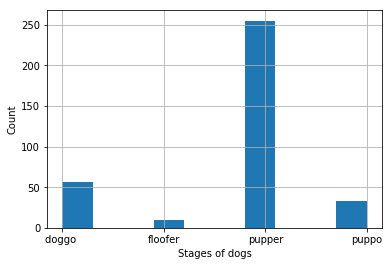

In [108]:
# most popular stages of dogs 
df_clean.stage.hist()
plt.xlabel('Stages of dogs')
plt.ylabel('Count')



- The most popular stages of dogs is the pupper and the least popular is the floofer

In [99]:
# Retweet count and favorite count analysis 
df_clean.describe()

,in_reply_to_status_id,in_reply_to_user_id,rating_numerator,rating_denominator,retweet_count,favorite_count
count,7.800000e+01,7.800000e+01,2175.000000,2175.000000,2175.000000,2175.000000
mean,7.455079e+17,2.014171e+16,12.233563,10.000920,1612.595862,5951.098851
std,7.582492e+16,1.252797e+17,42.466196,0.250113,3943.983735,12143.506859
min,6.658147e+17,1.185634e+07,0.000000,2.000000,0.000000,0.000000
25%,6.757419e+17,3.086374e+08,10.000000,10.000000,0.000000,0.000000
50%,7.038708e+17,4.196984e+09,11.000000,10.000000,0.000000,0.000000
75%,8.257804e+17,4.196984e+09,12.000000,10.000000,2114.000000,8676.000000
max,8.862664e+17,8.405479e+17,1776.000000,16.000000,61256.000000,140941.000000


(Text(0,0.5,'favorite count'),)

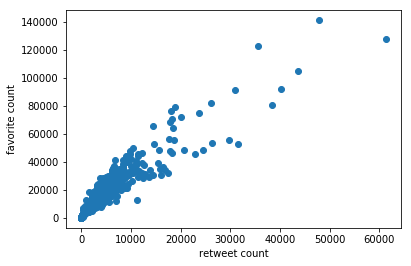

In [100]:
plt.scatter(df_clean.retweet_count, df_clean.favorite_count)
plt.xlabel('retweet count')
plt.ylabel('favorite count'),

In [101]:
np.corrcoef(df_clean.retweet_count, df_clean.favorite_count)

array([[1.        , 0.94164512],
       [0.94164512, 1.        ]])

- there is a strong correlation between the favorite_count and the retweet_count variables and the correlation coeficient is 0.94 
- this correlation imply that the more popular is a tweet the more it is retweeted 

[0, 2200, 0, 750]

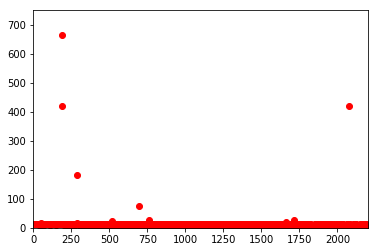

In [102]:
# rating analysis 
plt.plot(df_clean.rating_numerator,'ro')
plt.axis([0, 2200, 0, 750])

Text(0,0.5,'rating denominator')

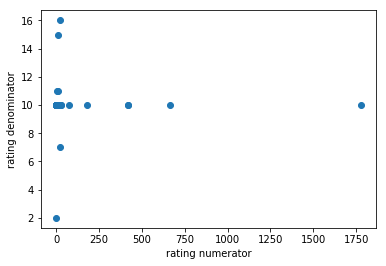

In [103]:


plt.scatter(df_clean.rating_numerator, df_clean.rating_denominator)
plt.xlabel('rating numerator')
plt.ylabel('rating denominator')

the numerator ratings are between 10 and 12 with some outliers 

Text(0,0.5,'Count')

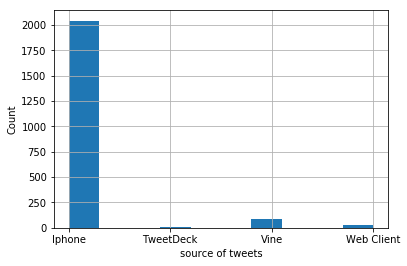

In [107]:
# tweet source analysis 
df_clean.source.hist()
plt.xlabel('source of tweets')
plt.ylabel('Count')

Iphone is by far the most used way of using twitter.  

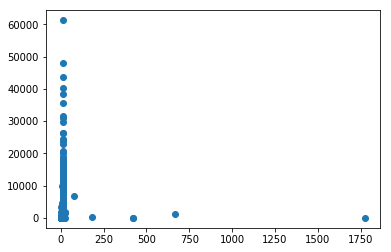

In [111]:
# relationship between the favorite count and the numerator rating
plt.scatter(df_clean.rating_numerator, df_clean.favorite_count)

In [110]:
np.corrcoef(df_clean.rating_numerator, df_clean.favorite_count)

array([[1.        , 0.00556057],
       [0.00556057, 1.        ]])

there is no correlation between the favorite count and the rating 